# Testing data integrity

first going to try and identify any uncropped images, such as:

(505, 766)


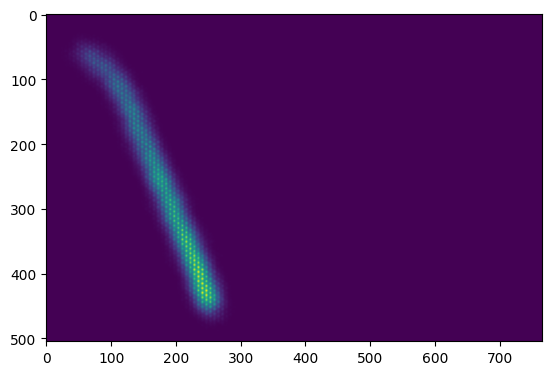

In [1]:
import matplotlib.pyplot as plt
import numpy as np

sus_image_file = "../ANN-code/Data/im0/604.960keV_0.000_0.000_C_2.210cm_4704_im.npy"

image = np.load(sus_image_file)
print(image.shape)
np.savetxt("image.csv", image, delimiter=",")

plt.imshow(image)
plt.show()

so this recoil is uncropped in x. i have planted it in the local data so it can be extracted as a test.

method i'm employing to find these problematic images:

1. Check image max_x e.g. from max_y, max_x = image.shape
2. Check largest x value max_nonzero_x with nonzero intensity (with non-noisy images)
3. Compare based on some criteria e.g. if max_nonzero_x < search_fraction * max_x 
4. Return a list of all images that satisfy this
5. Check through by hand, and adjust search fraction.
6. Repeat with same criteria for y

In [3]:
# testing bounding box ID

from feature_extraction import extract_bounding_box
from image_analysis import plot_bounding_box

bounding_box = extract_bounding_box(image)
plot_bounding_box(image, bounding_box)

ModuleNotFoundError: No module named 'feature_extraction'

In [6]:
# checking for problematic images using my test functions
import os
import sys
from tqdm import tqdm

print("Current working directory: ", os.getcwd())
sys.path.append(os.path.abspath('../ANN-code'))

from image_preprocessing import uncropped_check, dim_check

# Directories to check
im_dirs = [
    "../ANN-code/Data/im0",
    ]

# check all images in the directory (end in .npy)
min_dim_error = []
uncropped_error = []

# ssearch criteria
search_fraction = 0.8
min_dim = 20

for im_dir in im_dirs:
    for file in tqdm(os.listdir(im_dir)):
        if file.endswith(".npy"):
            im_file = os.path.join(im_dir, file)
            image = np.load(im_file)

            if dim_check(image, min_dim):
                min_dim_error.append(im_file)
                continue

            if uncropped_check(image, search_fraction, method='max_comparison'):
                uncropped_error.append(im_file)
                continue

            if uncropped_check(image, search_fraction, method='area_comparison'):
                uncropped_error.append(im_file)
                

print("Number of images that violate the minimum dimension criteria: ", len(min_dim_error))
print("Number of images that violate the uncropped criteria: ", len(uncropped_error))

# save the min_dim_error and uncropped_error lists as csv files

# np.savetxt("min_dim_error.csv", min_dim_error, delimiter=",", fmt="%s")
# np.savetxt("uncropped_error.csv", uncropped_error, delimiter=",", fmt="%s")


Current working directory:  /Users/benstevens/MIGDAL/NR-ANN/notebooks


100%|██████████| 2027/2027 [00:00<00:00, 2204.99it/s]

Number of images that violate the minimum dimension criteria:  9
Number of images that violate the uncropped criteria:  1


In [ ]:
for file in sus_images:
    image = np.load(file)
    plt.imshow(image)
    plt.show()